### **Dataset 2:** 5flowers

# **XÂY DỰNG MÔ HÌNH**

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical

folder = '/content/drive/MyDrive/AI_dataset_5flowers/train_set/'
photos, labels = list(), list()

for file in listdir(folder):
    output = 0
    if file.startswith('camtucau'):     # cẩm tú cầu
        output = 1
    if file.startswith('daisy'):        # hoa cúc
        output = 2
    if file.startswith('hoagiay'):      # hoa giấy
        output = 3
    if file.startswith('rose'):         # hoa hồng
        output = 4
    if file.startswith('water lily'):   # hoa súng nước
        output = 5

    photo = load_img(folder+file,target_size=(30,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos) 
labels = asarray(labels) 
labels = to_categorical(labels) 
print('X size:', photos.shape,'\ny size:' , labels.shape)
save('5flowers_train_imgs.npy',photos)
save('5flowers_train_labels.npy',labels)

X size: (1200, 30, 30, 3) 
y size: (1200, 6)


In [ ]:
import numpy as np
x_train = np.load('5flowers_train_imgs.npy')
y_train = np.load('5flowers_train_labels.npy')
x_train = x_train.reshape(1200, 30, 30, 3)
x_train= x_train.astype('float32')/255
print(x_train.shape, y_train.shape)

(1200, 30, 30, 3) (1200, 6)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(30,30,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1)
model.summary()

Epoch 1/30
19/19 [==============================] - 8s 315ms/step - loss: 1.5890 - accuracy: 0.2575
Epoch 2/30
19/19 [==============================] - 8s 443ms/step - loss: 1.3212 - accuracy: 0.4275
Epoch 3/30
19/19 [==============================] - 6s 308ms/step - loss: 1.1352 - accuracy: 0.5242
Epoch 4/30
19/19 [==============================] - 3s 161ms/step - loss: 1.0158 - accuracy: 0.6025
Epoch 5/30
19/19 [==============================] - 5s 242ms/step - loss: 0.9609 - accuracy: 0.6292
Epoch 6/30
19/19 [==============================] - 4s 223ms/step - loss: 0.9111 - accuracy: 0.6458
Epoch 7/30
19/19 [==============================] - 3s 159ms/step - loss: 0.8645 - accuracy: 0.6725
Epoch 8/30
19/19 [==============================] - 3s 161ms/step - loss: 0.8040 - accuracy: 0.6933
Epoch 9/30
19/19 [==============================] - 4s 194ms/step - loss: 0.7329 - accuracy: 0.7300
Epoch 10/30
19/19 [==============================] - 6s 333ms/step - loss: 0.7271 - accuracy: 0.7125

# **TÍNH TOÁN ĐỘ CHÍNH XÁC**

In [ ]:
import numpy as np
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical

folder = '/content/drive/MyDrive/AI_dataset_5flowers/test_set/'
photos, labels = list(), list()

for file in listdir(folder):
    output = 0
    if file.startswith('camtucau'):     # cẩm tú cầu
        output = 1
    if file.startswith('daisy'):        # hoa cúc
        output = 2
    if file.startswith('hoagiay'):      # hoa giấy
        output = 3
    if file.startswith('rose'):         # hoa hồng
        output = 4
    if file.startswith('water lily'):   # hoa súng nước
        output = 5

    photo = load_img(folder+file,target_size=(30,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos) 
labels = asarray(labels) 
labels = to_categorical(labels) 
print('X size:', photos.shape,'\ny size:' , labels.shape)

save('5flowers_test_imgs.npy',photos)
save('5flowers_test_labels.npy',labels)

x_test = np.load('5flowers_test_imgs.npy')
y_test = np.load('5flowers_test_labels.npy')
x_test = x_test.reshape(50, 30, 30, 3)
x_test = x_test.astype('float32')/255
print('x_test shape:', x_test.shape, '\ny_test shape:', y_test.shape)

X size: (50, 30, 30, 3) 
y size: (50, 6)
x_test shape: (50, 30, 30, 3) 
y_test shape: (50, 6)


In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('accuracy:', acc, '\nloss:', loss)

2/2 [==============================] - 0s 39ms/step - loss: 0.5242 - accuracy: 0.8400
accuracy: 0.8399999737739563 
loss: 0.524198591709137


In [ ]:
model.save('model_5flowers_84percent.h5')

# **DỰ ĐOÁN 10 ẢNH CÓ SẴN TRONG TỆP KIỂM TRA (TEST_SET)**

available options: camtucau, daisy, hoagiay, rose, water lily
what do you want to predict from test_set: hoagiay
1/1 [==============================] - 0s 469ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 51ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 117ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 51ms/step
Predicted label: cam tu cau
1/1 [==============================] - 0s 54ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 47ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 38ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 39ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 42ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 54ms/step
Predicted label: hoa giay


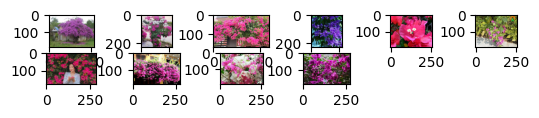

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/AI_dataset_5flowers/test_set/'

my_dict = {1:'cam tu cau', 2:'hoa cuc', 3:'hoa giay', 4:'hoa hong', 5:'hoa sung nuoc'}

print('available options: camtucau, daisy, hoagiay, rose, water lily')
input_ = input("what do you want to predict from test_set: ")

for i in range(10):
  plt.subplot(10,6,i+1)
  filename = folder + input_ + ' (' + str(i+1) + ').jpg'
  img = imread(filename)
  plt.imshow(img)
  # Load the image and convert it to a numpy array
  img = load_img(filename, target_size=(30, 30))
  img_arr = img_to_array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  # Perform prediction on the image
  prediction = model.predict(img_arr)
  # Get the label with the highest probability
  label = np.argmax(prediction)
  print('Predicted label:', my_dict[label])
plt.show()

# **DỰ ĐOÁN ẢNH BẰNG ẢNH NGOÀI TỰ TẢI LÊN**

1/1 [==============================] - 0s 74ms/step
Predicted label: hoa giay
1/1 [==============================] - 0s 84ms/step
Predicted label: hoa hong
1/1 [==============================] - 0s 67ms/step
Predicted label: cam tu cau


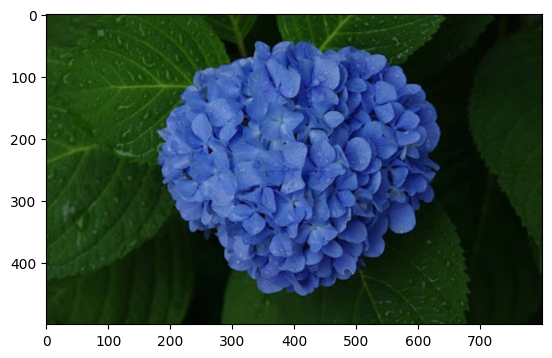

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

my_dict = {1:'cam tu cau', 2:'hoa cuc', 3:'hoa giay', 4:'hoa hong', 5:'hoa sung nuoc'}

uploaded_imgs = ['hoagiay_upload.jpg',
                 'rose_upload.png',
                 'camtucau_upload.jpg']

for image in uploaded_imgs:
  # Load the image
  img = Image.open(image).convert('RGB')
  # print uploaded image
  plt.imshow(img)
  # convert it to a numpy array
  img = img.resize((30,30))
  img_arr = np.array(img)
  img_arr = img_arr.reshape((1,) + img_arr.shape)
  img_arr = img_arr.astype('float32')/255
  # Perform prediction on the image
  prediction = model.predict(img_arr)
  # Get the label with the highest probability
  label = np.argmax(prediction)
  print('Predicted label:', my_dict[label])